##                    Project Name -: Loan Eligibility Prediction
##                    Author -:  Saket Srivastav  
##                    College -: IIT(ISM) Dhanbad

***Importing the required libraries***

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     
import seaborn as sns

***Loading the dataset and performing basic operations.***

In [141]:
df=pd.read_csv("Loan_Prediction_Dataset.csv")

In [142]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [143]:
df.shape

(614, 13)

In [144]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [146]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


***Heatmap to check the correlation between the columns.***

In [147]:
df.corr()

<ipython-input-147-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<ipython-input-148-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

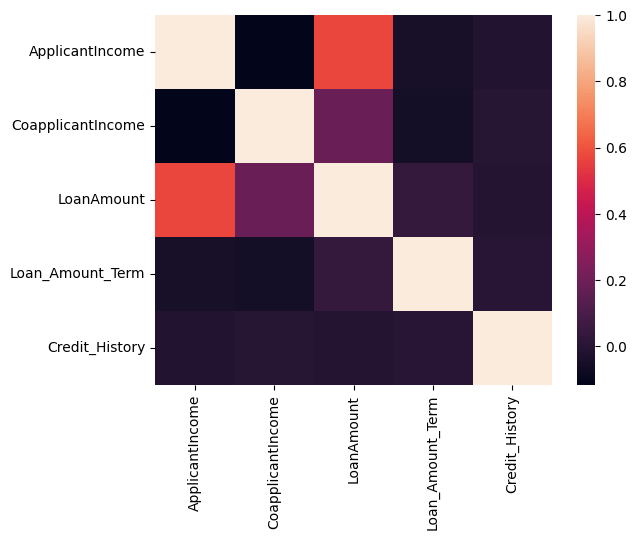

In [148]:
sns.heatmap(df.corr())

***Since the percentage of null values in the dataset of every column is very less. So,we can use mode of data to fill the NaN values(in categorical columns).***

In [149]:
df.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

***Division into numerical and categorical data.***

In [150]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [151]:
numeric_data.shape[1]


5

In [152]:
categorical_data.shape[1]      # "Dependents" belong to categorical data because it has value that is 3+ .

8

In [153]:
categorical_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [154]:
def handle_c_nan(df,variable):
  most_freq_category=df[variable].mode()[0]
  df[variable].fillna(most_freq_category,inplace=True)

In [155]:
for item in categorical_data:
  handle_c_nan(df,item)
  

In [156]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [157]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


Checking percentage of missing data in numerical features. 

In [158]:
numeric_data.isnull().mean()

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
dtype: float64

***Handling missing data in numerical features.***

In [159]:
def handle_n_nan(df,variable):
  most_freq_category=df[variable].median()
  df[variable].fillna(most_freq_category,inplace=True)

In [160]:
for item in numeric_data:
  handle_n_nan(df,item)

In [161]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [162]:
categorical_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


<Axes: xlabel='Gender', ylabel='count'>

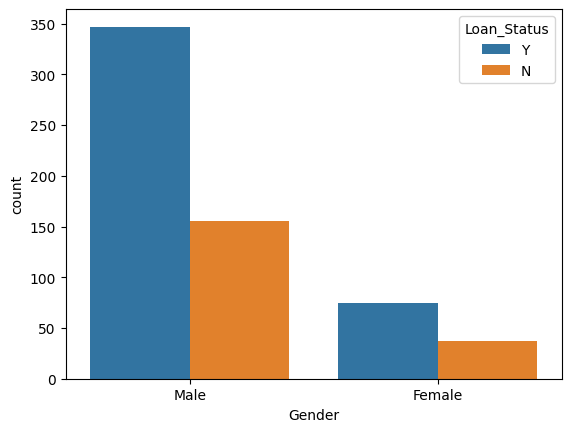

In [163]:
sns.countplot(x="Gender",data=df,hue="Loan_Status") 
  

<Axes: xlabel='Property_Area', ylabel='count'>

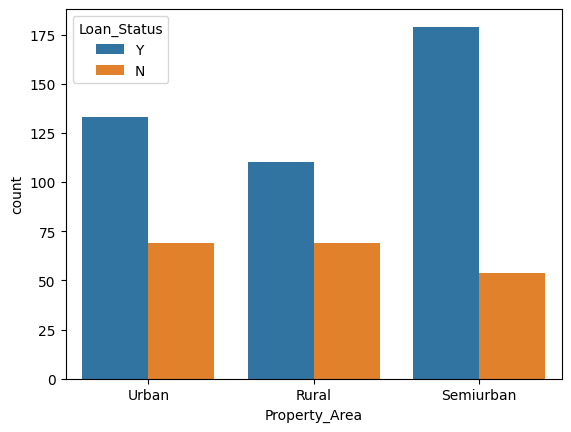

In [164]:
sns.countplot(x="Property_Area",data=df,hue="Loan_Status")


<Axes: xlabel='Married', ylabel='count'>

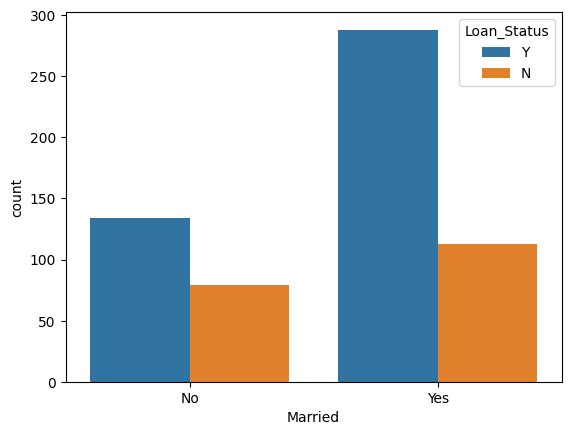

In [165]:
sns.countplot(x="Married",data=df,hue="Loan_Status")

<Axes: xlabel='Dependents', ylabel='count'>

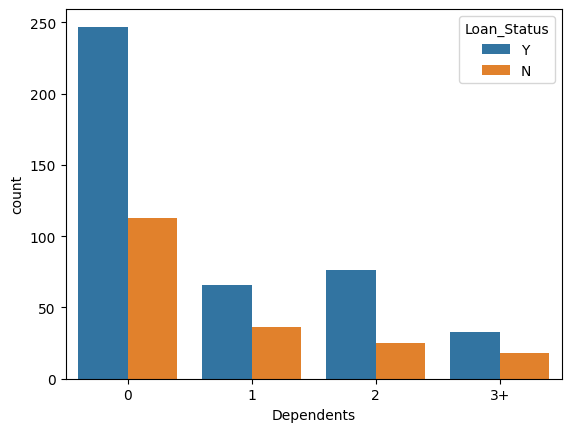

In [166]:
sns.countplot(x="Dependents",data=df,hue="Loan_Status")

<Axes: xlabel='Education', ylabel='count'>

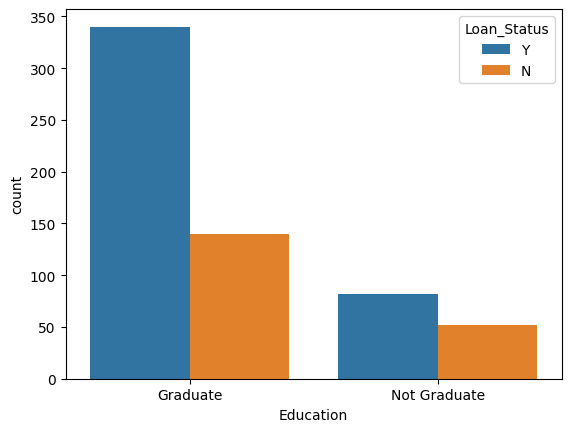

In [167]:
sns.countplot(x="Education",data=df,hue="Loan_Status")

<Axes: xlabel='Self_Employed', ylabel='count'>

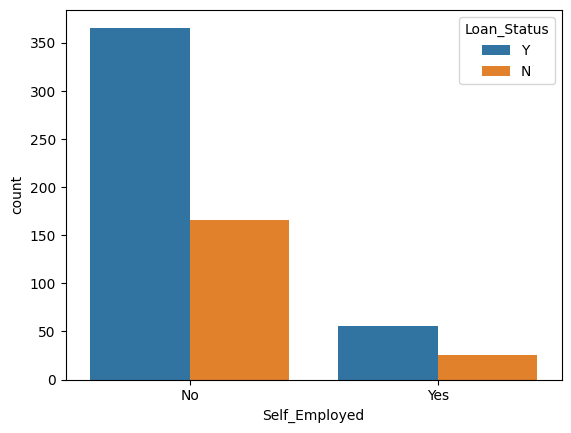

In [168]:
sns.countplot(x="Self_Employed",data=df,hue="Loan_Status")

***Checking for Outliers in various features using Box Plot in Seaborn Library.***

<Axes: >

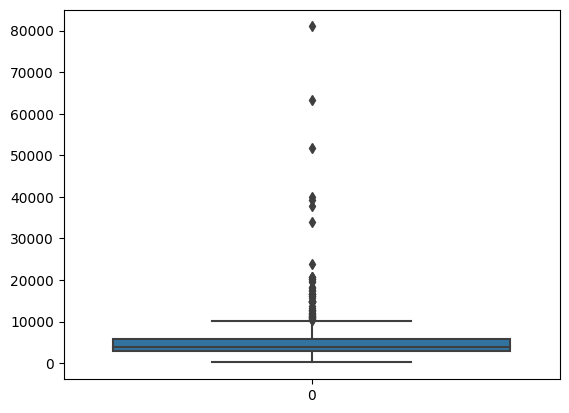

In [169]:
sns.boxplot(df["ApplicantIncome"])

<Axes: >

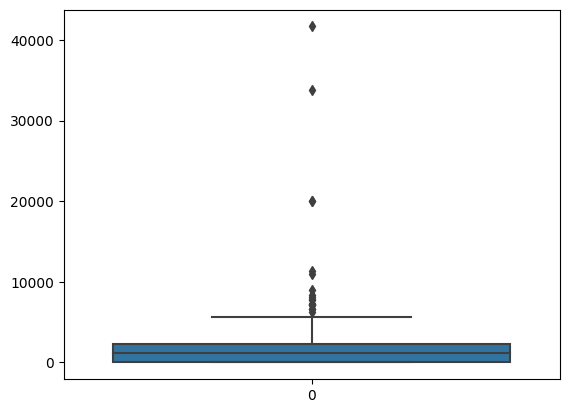

In [170]:
sns.boxplot(df["CoapplicantIncome"])

<Axes: >

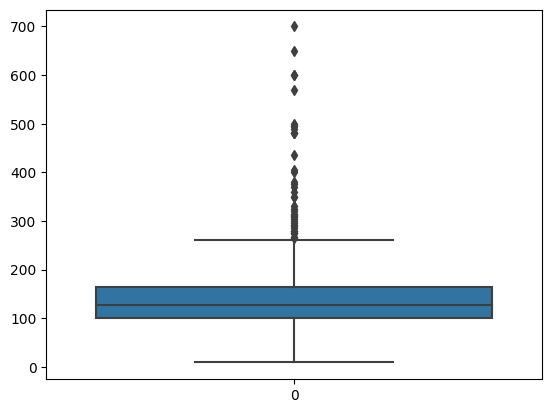

In [171]:
sns.boxplot(df["LoanAmount"])

***Encoding the categorical variables.***

In [172]:
df=pd.get_dummies(df,columns=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],drop_first=True)

In [173]:
df.shape

(614, 16)

In [174]:
df.drop("Loan_ID",axis=1,inplace=True)    ## Dropping Loan_ID as it has no relation with the dependent feature.

In [175]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df["Loan_Status"]= label_encoder.fit_transform(df["Loan_Status"])

In [176]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1


***Classifying into dependent and independent variables.***

In [177]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [178]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [179]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

***Performing train test spilt in x,y***

In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

***Standardisation of data***

In [181]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

***NAIVE BAYES model for training***

In [182]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(x_train,y_train)


GaussianNB()

***Predicting on test data***

In [183]:
y_pred=NBClassifier.predict(x_test)

***Performance check***

In [192]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15 18]
 [ 3 87]]


0.8292682926829268